In [37]:
import pandas as pd
import matplotlib.pyplot as plt


In [38]:


results = pd.read_csv(
    "Discharge_Reference_8992.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

print(results.index)  # will show a DatetimeIndex
print(results.head())

DatetimeIndex(['1989-01-01 00:00:00+00:00', '1989-01-02 00:00:00+00:00',
               '1989-01-03 00:00:00+00:00', '1989-01-04 00:00:00+00:00',
               '1989-01-05 00:00:00+00:00', '1989-01-06 00:00:00+00:00',
               '1989-01-07 00:00:00+00:00', '1989-01-08 00:00:00+00:00',
               '1989-01-09 00:00:00+00:00', '1989-01-10 00:00:00+00:00',
               ...
               '1992-12-22 00:00:00+00:00', '1992-12-23 00:00:00+00:00',
               '1992-12-24 00:00:00+00:00', '1992-12-25 00:00:00+00:00',
               '1992-12-26 00:00:00+00:00', '1992-12-27 00:00:00+00:00',
               '1992-12-28 00:00:00+00:00', '1992-12-29 00:00:00+00:00',
               '1992-12-30 00:00:00+00:00', '1992-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=1461, freq=None)
                               Chatly        Kerki      Tyumen   Kazalinsk
time                                                                      
1989-01-01 00:00:00+

In [39]:
results_i = pd.read_csv(
    "Discharge_Irrigation_8992.csv",
    index_col=0,          # use first column as index
    parse_dates=True      # automatically parse as datetime if possible
)

print(results_i.index)  # will show a DatetimeIndex
print(results_i.head())

DatetimeIndex(['1989-01-01 00:00:00+00:00', '1989-01-02 00:00:00+00:00',
               '1989-01-03 00:00:00+00:00', '1989-01-04 00:00:00+00:00',
               '1989-01-05 00:00:00+00:00', '1989-01-06 00:00:00+00:00',
               '1989-01-07 00:00:00+00:00', '1989-01-08 00:00:00+00:00',
               '1989-01-09 00:00:00+00:00', '1989-01-10 00:00:00+00:00',
               ...
               '1992-12-22 00:00:00+00:00', '1992-12-23 00:00:00+00:00',
               '1992-12-24 00:00:00+00:00', '1992-12-25 00:00:00+00:00',
               '1992-12-26 00:00:00+00:00', '1992-12-27 00:00:00+00:00',
               '1992-12-28 00:00:00+00:00', '1992-12-29 00:00:00+00:00',
               '1992-12-30 00:00:00+00:00', '1992-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=1461, freq=None)
                               Chatly        Kerki      Tyumen   Kazalinsk
time                                                                      
1989-01-01 00:00:00+

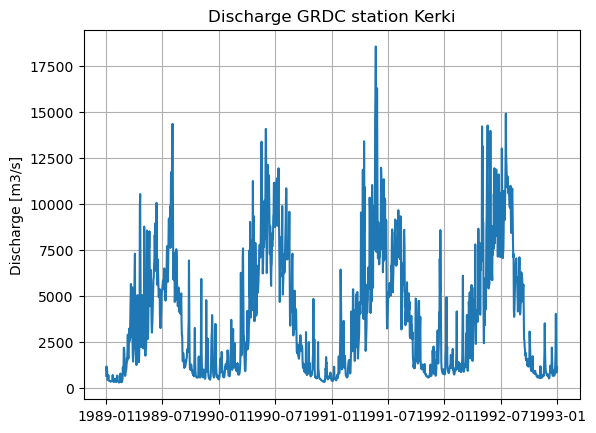

In [40]:
plt.plot(results['Kerki'])


plt.title('Discharge GRDC station Kerki')
plt.ylabel('Discharge [m3/s]')
plt.grid()


plt.show()


In [41]:
max_value = max(results.max())
print(max_value)

21346.40234375


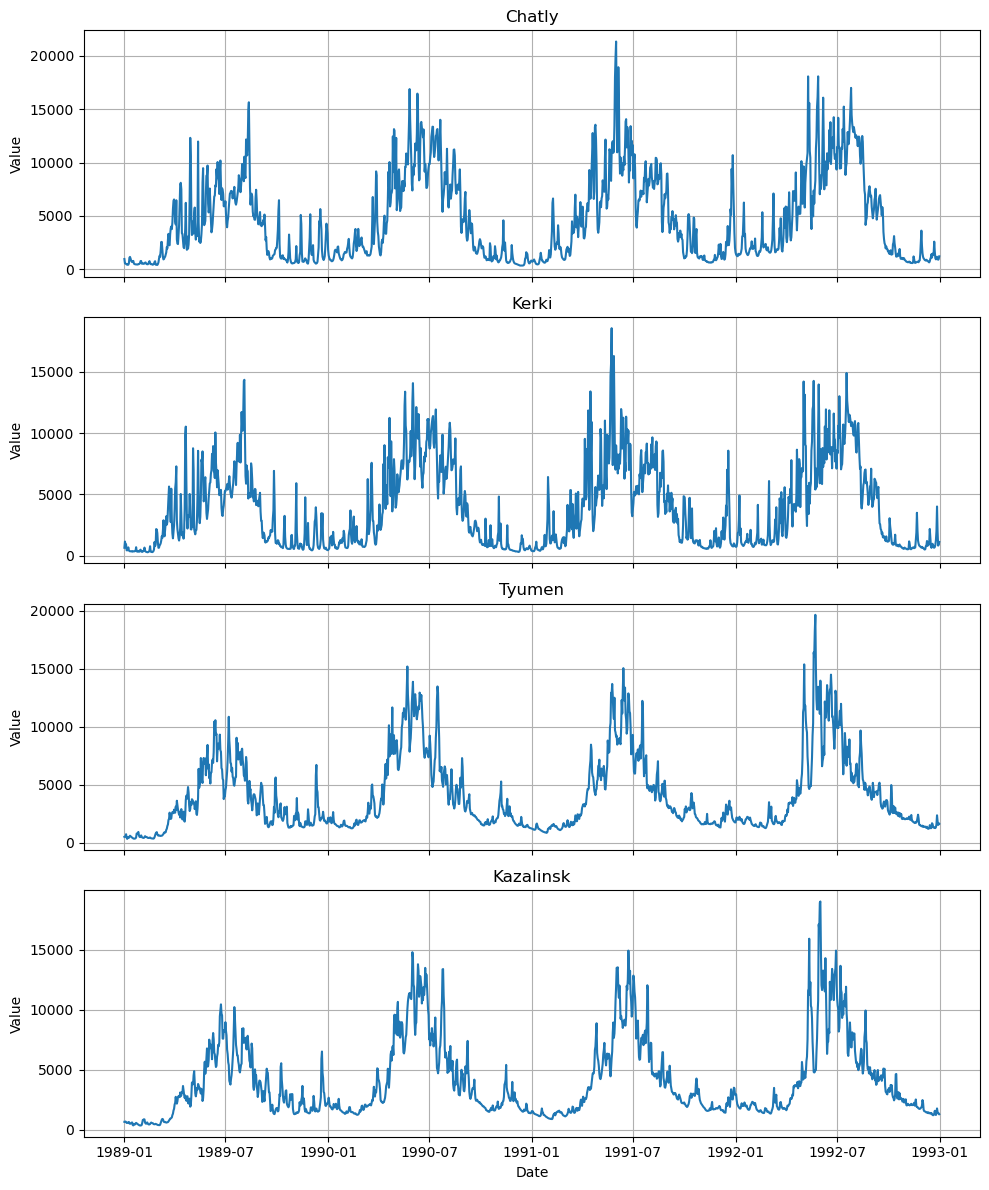

In [42]:
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)  
# 4 rows, 1 column of subplots

stations = results.columns[:4]  # first 4 columns

for i, station in enumerate(stations):
    axes[i].plot(results.index, results[station])
    axes[i].set_title(station)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

axes[-1].set_xlabel('Date')  # label only bottom plot
plt.tight_layout()
plt.show()

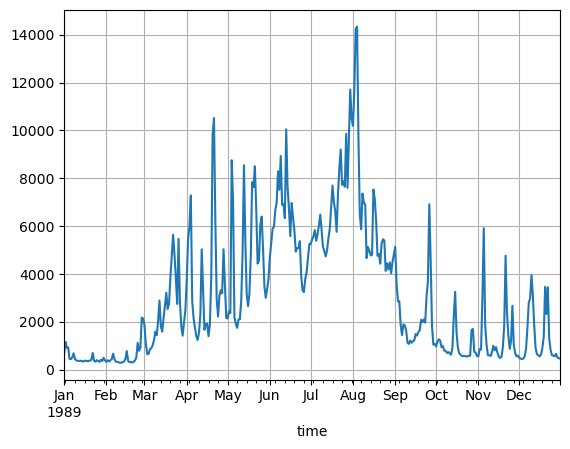

In [43]:
results.loc['1989']['Kerki'].plot()
plt.grid()

In [47]:
from ewatercycle.observation.grdc import get_grdc_data

ds = get_grdc_data(2617110,
                   '1900-01-01T00:00Z',
                   '2001-01-01T00:00Z',
                   data_home='/home/avandervee3/MSc_AralSea/book/thesis_projects/MSc/2025_Q1_AndreVanDerVeen_CEG/work_in_progress/Test_Aral/')
ds

<xarray.Dataset> Size: 316kB
Dimensions:              (time: 19724)
Coordinates:
  * time                 (time) datetime64[ns] 158kB 1936-01-01 ... 1989-12-31
    id                   int64 8B 2617110
Data variables:
    streamflow           (time) float64 158kB 914.0 938.0 926.0 ... 604.0 583.0
    area                 float64 8B 3.09e+05
    country              <U2 8B 'TM'
    geo_x                float64 8B 65.25
    geo_y                float64 8B 37.83
    geo_z                float64 8B 241.0
    owneroforiginaldata  <U85 340B 'Initial dataset collected in the framewor...
    river_name           <U9 36B 'AMU DARYA'
    station_name         <U5 20B 'KERKI'
    timezone             float64 8B nan
Attributes:
    title:          NA
    Conventions:    CF-1.7
    references:     grdc.bafg.de
    institution:    GRDC
    history:        Converted from 2617110_Q_Day.Cmd.txt of 2025-09-02 to net...
    missing_value:  -999.000

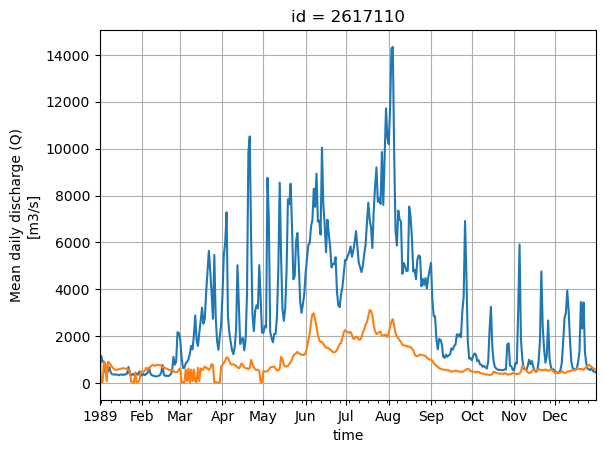

In [54]:
results.loc['1989']['Kerki'].plot(label = 'PCR-GLOBWB Kerki')
ds['streamflow'].sel(time=slice('1989', '1992')).plot(label='GRDC Kerki')
plt.grid()

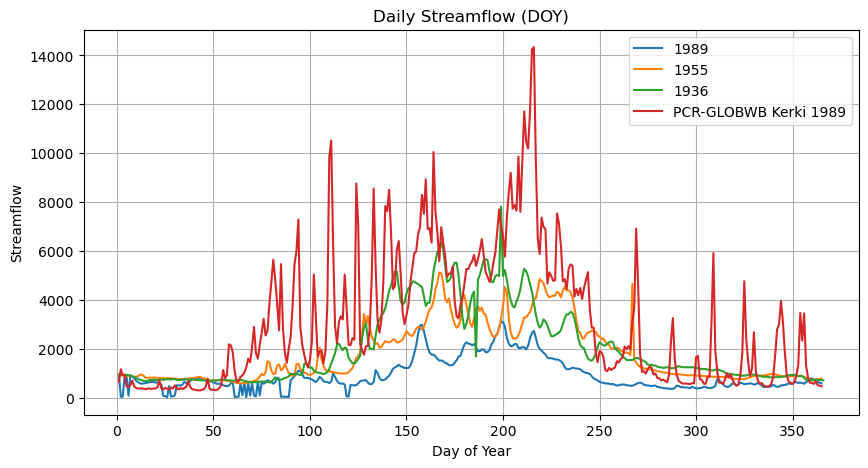

In [64]:
sf_1989 = ds['streamflow'].sel(time=slice('1989-01-01', '1989-12-31'))
sf_1935 = ds['streamflow'].sel(time=slice('1955-01-01', '1955-12-31'))
sf_1936 = ds['streamflow'].sel(time=slice('1936-01-01', '1936-12-31'))

# Convert to pandas for easy day-of-year handling
sf_1989_df = sf_1989.to_series()
sf_1935_df = sf_1935.to_series()
sf_1936_df = sf_1936.to_series()

# Select 1989 for Kerki
kerki_1989 = results.loc['1989', 'Kerki']

# Reindex by day-of-year
kerki_1989.index = kerki_1989.index.dayofyear

# Plot


# Group/align by day-of-year index
sf_1989_df.index = sf_1989_df.index.dayofyear
sf_1935_df.index = sf_1935_df.index.dayofyear
sf_1936_df.index = sf_1936_df.index.dayofyear

plt.figure(figsize=(10,5))
plt.plot(sf_1989_df.index, sf_1989_df.values, label='1989')
plt.plot(sf_1935_df.index, sf_1935_df.values, label='1955')
plt.plot(sf_1936_df.index, sf_1936_df.values, label='1936') 
kerki_1989.plot(label='PCR-GLOBWB Kerki 1989')

plt.xlabel('Day of Year')
plt.ylabel('Streamflow')
plt.title('Daily Streamflow (DOY)')
plt.legend()
plt.grid(True)
plt.show()

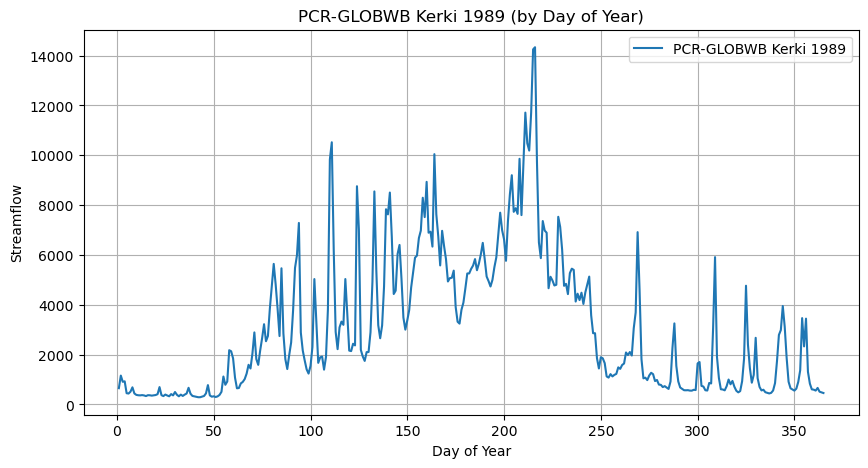

In [61]:
# Select 1989 for Kerki
kerki_1989 = results.loc['1989', 'Kerki']

# Reindex by day-of-year
kerki_1989.index = kerki_1989.index.dayofyear

# Plot
plt.figure(figsize=(10,5))
kerki_1989.plot(label='PCR-GLOBWB Kerki 1989')

plt.xlabel('Day of Year')
plt.ylabel('Streamflow')
plt.title('PCR-GLOBWB Kerki 1989 (by Day of Year)')
plt.grid(True)
plt.legend()
plt.show()

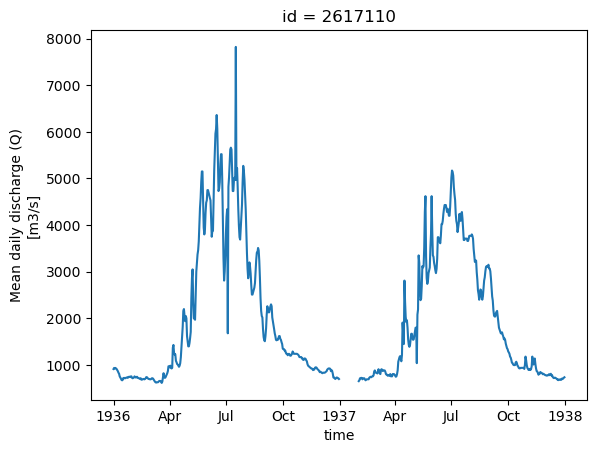

In [63]:
ds['streamflow'].sel(time=slice('1930', '1940')).plot(label='GRDC Kerki')